### Try modeling a network of authors - contributors

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# !pip install networkx

In [63]:
df = pd.read_csv("data/cleaned/pubs.csv")

C:\Users\20211831\AppData\Local\Temp\ipykernel_28616\887412386.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/cleaned/pubs.csv")


In [64]:
df = df.iloc[:100]

In [65]:
G = nx.Graph()

In [84]:
df.head()

,integer_id,thesis_identifier,institution,author_name,title,year,language,contributor_1,contributor_2,contributor_3,contributor_4,contributor_5,contributor_6,contributor_7,contributor_8,contributor_9,contributor_10
0,1,https://pure.amc.nl/en/publications/structure-...,amcpub,"Azaripour, Adriano",Structure and function of the human periodonti...,2016,en,"van Noorden, C.J.F.","Willershausen, B.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://pure.amc.nl/en/publications/neurocogni...,amcpub,"Thissen, Andrieke J. A. M.",Neurocognitive and genetic factors in ADHD acr...,2014,en,"Buitelaar, J.K.","Franke, B.","Lambregts-Rommelse, N.N.J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,https://pure.amc.nl/en/publications/quality-of...,amcpub,"van Huis, Maike",Quality of care and monitoring in paediatric e...,2016,en,"van Goudoever, H.B.","Groothoff, J.W.","van der Lee, H.H.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,https://pure.amc.nl/en/publications/optimizing...,amcpub,"Creemers, Huub",Optimizing quality of care for patients with A...,2016,en,"van den Berg, L.H.","Beelen, A.A.J.M.","Veldink, J.H.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,https://pure.amc.nl/en/publications/bridging-t...,amcpub,"Verlaan, Tessa",Bridging the gap between gastrointestinal endo...,2016,en,"Fockens, P.","Bemelman, W.A.","van Hooft, J.E.","van Berge Henegouwen, M.I.",NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
for author in df['author_name'].unique():
    G.add_node(author, node_type='author')

In [68]:
for index, row in df.iterrows():
    for col in range(1, 11):  # Assuming there are 10 contributor columns
        contributor = row[f'contributor_{col}']
        if not pd.isnull(contributor):
            G.add_node(contributor, node_type='contributor')

In [69]:
for index, row in df.iterrows():
    author = row['author_name']
    for col in range(1, 11):  # Assuming there are 10 contributor columns
        contributor = row[f'contributor_{col}']
        if not pd.isnull(contributor):
            G.add_edge(author, contributor)

In [76]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 324
Number of edges: 273


In [83]:
print("Nodes:", G.nodes())
print("Edges:", G.edges())


Nodes: ['Azaripour, Adriano', 'Thissen, Andrieke J. A. M.', 'van Huis, Maike', 'Creemers, Huub', 'Verlaan, Tessa', 'Hoffmans, Ruth', 'van Riel, Annelieke C. M. J.', 'van Cleeff, M. R. A.', 'Eminović, Nina', 'Mugo, Peter M.', 'Dorlo, Thomas P. C.', 'Zuurbier, Susanna M.', 'Kroon, Maria Wilhelmina', 'El Manouni El Hassani, Sofia', 'Leensen, Monique C. J.', 'Germans, Menno Robbert', 'van Steen, Sigrid C. J.', 'van Andel, Harmen', 'Tanis, P. J.', 'Ebbing, Eva A.', 'da Silva Alves, Fabiana', 'Kloek, Anne T.', 'van den Bos, Willemien', 'Post, Rene', 'van Duijvenboden, Karel', 'van der Leeuw, Renée M.', 'Remme, C. A.', 'Riool, Martijn', 'Vollebregt, Karlijn C.', 'Vermeeren, Lenka', 'Lambers, Kaj T. A.', 'van den Bekerom, Michel P. J.', 'van Meurs, Hannah Suzan', 'de Haan, L.', 'Guerci, Philippe O.', 'Geervliet, Pieter C.', 'Spuls, P. I.', 'Nicolaou, Mary', 'Mik, Egbert G.', 'Kamminga, S.', 'Derking, Ronald', 'Stegmann, Tamara C.', 'Keikes, Lotte', 'Boyette, Lindy-Louise Nora Jennifer', 'ten B

In [87]:
node = 'Azaripour, Adriano'
print("Neighbors of node", node, ":", list(G.neighbors(node)))


Neighbors of node Azaripour, Adriano : ['van Noorden, C.J.F.', 'Willershausen, B.']


In [88]:
# Node attributes
print("Node attributes:", G.nodes(data=True))

# Edge attributes
print("Edge attributes:", G.edges(data=True))


Node attributes: [('Azaripour, Adriano', {'node_type': 'author'}), ('Thissen, Andrieke J. A. M.', {'node_type': 'author'}), ('van Huis, Maike', {'node_type': 'author'}), ('Creemers, Huub', {'node_type': 'author'}), ('Verlaan, Tessa', {'node_type': 'author'}), ('Hoffmans, Ruth', {'node_type': 'author'}), ('van Riel, Annelieke C. M. J.', {'node_type': 'author'}), ('van Cleeff, M. R. A.', {'node_type': 'author'}), ('Eminović, Nina', {'node_type': 'author'}), ('Mugo, Peter M.', {'node_type': 'author'}), ('Dorlo, Thomas P. C.', {'node_type': 'author'}), ('Zuurbier, Susanna M.', {'node_type': 'author'}), ('Kroon, Maria Wilhelmina', {'node_type': 'author'}), ('El Manouni El Hassani, Sofia', {'node_type': 'author'}), ('Leensen, Monique C. J.', {'node_type': 'author'}), ('Germans, Menno Robbert', {'node_type': 'author'}), ('van Steen, Sigrid C. J.', {'node_type': 'author'}), ('van Andel, Harmen', {'node_type': 'author'}), ('Tanis, P. J.', {'node_type': 'author'}), ('Ebbing, Eva A.', {'node_type

In [80]:
columns_to_iterate = df.columns[7:].tolist()
val=[]
for column_name in columns_to_iterate:
    for value in df[column_name]:
        if pd.notna(value):
            if value not in val:
                val.append(value)
len(val)

225

In [82]:
vals=[]
for auth in df["author_name"]:
    if auth not in vals:
        vals.append(auth)
len(vals)

100

In [70]:
pos = nx.spring_layout(G, seed=42)
node_colors = {'author': 'blue', 'contributor': 'green'}
node_shapes = {'author': 'o', 'contributor': '^'}

In [71]:
# node_type = nx.get_node_attributes(G, 'node_type')
# node_color = [node_colors[node_type[node]] for node in G.nodes()]
# node_shape = [node_shapes[node_type[node]] for node in G.nodes()]

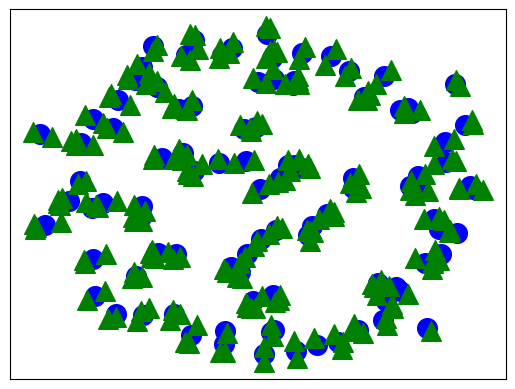

In [73]:
for node, data in G.nodes(data=True):
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_colors[data['node_type']],
                           node_shape='o' if data['node_type'] == 'author' else '^', node_size=200)

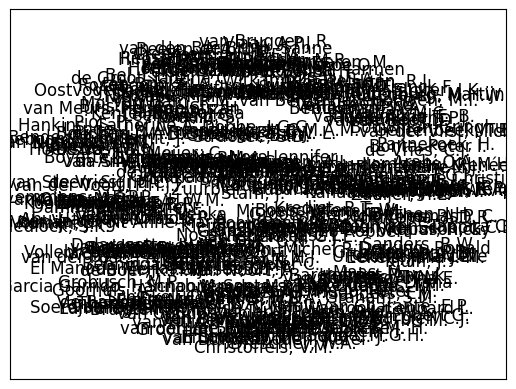

In [74]:
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

plt.show()

In [75]:
print(G)

Graph with 324 nodes and 273 edges
